<a href="https://colab.research.google.com/github/mightydhan725/York/blob/main/SummativeAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.0 MB/s eta 0:00:00


In [3]:
from xlwt import Workbook
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Summative_Assessment')



Mounted at /content/drive/


In [4]:
!pwd

/content/drive/My Drive/Summative_Assessment


In [6]:
trainData=pd.read_excel('BankChurnersTrain.xls')
testData=pd.read_excel('BankChurnersTest.xls')
testData.head(3)

,CCNum,Trans_date_Time,Attrition_Flag,Surname,Age,Gender,CreditScore,Geography,Tenure,Education_Level,...,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,717651333,2019-01-06 05:05:36,Existing Customer,Davison,56,F,896,France,5,Doctorate,...,26923.0,13643,94,142662.68,1,0,0,60285.30,0,0
1,798489258,2019-01-06 05:06:28,Attrited Customer,Hamilton,60,M,787,Germany,8,College,...,15977.0,7745,64,102603.30,2,1,1,180693.61,0,0
2,710742408,2019-01-06 05:07:04,Existing Customer,Nnachetam,54,M,777,Spain,9,High School,...,26812.0,14838,110,0.00,2,1,0,126475.79,0,0


In [24]:
trainData["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
import numpy as np

trainData["Attrition_Flag"]=trainData["Attrition_Flag"].replace(['Existing Customer', 'Attrited Customer'],['1', '0'])

trainData["Gender"]=trainData["Gender"].replace(['M', 'F'],['1', '0'])

trainData["Geography_France"]=np.where(trainData["Geography"]=="France",1,0)
trainData["Geography_Spain"]=np.where(trainData["Geography"]=="Spain",1,0)
trainData["Geography_Germany"]=np.where(trainData["Geography"]=="Germany",1,0)

trainData["Education_Level_High_School"]=np.where(trainData["Education_Level"]=="High School",1,0)
trainData["Education_Level_Graduate"]=np.where(trainData["Education_Level"]=="Graduate",1,0)
trainData["Education_Level_Uneducated"]=np.where(trainData["Education_Level"]=="Uneducated",1,0)
trainData["Education_Level_Unknown"]=np.where(trainData["Education_Level"]=="Unknown",1,0)
trainData["Education_Level_College"]=np.where(trainData["Education_Level"]=="College",1,0)
trainData["Education_Level_Post_Graduate"]=np.where(trainData["Education_Level"]=="Post-Graduate",1,0)
trainData["Education_Level_Doctorate"]=np.where(trainData["Education_Level"]=="Doctorate",1,0)

trainData["Income_Category_60_To_80"]=np.where(trainData["Income_Category"]=="$60K - $80K",1,0)
trainData["Income_Category_Less_Than_40"]=np.where(trainData["Income_Category"]=="Less than $40K",1,0)
trainData["Income_Category_80_To_120"]=np.where(trainData["Income_Category"]=="$80K - $120K",1,0)
trainData["Income_Category_40_To_60"]=np.where(trainData["Income_Category"]=="$40K - $60K",1,0)
trainData["Income_Category_120_Plus"]=np.where(trainData["Income_Category"]=="$120K +",1,0)
trainData["Income_Category_Unknown"]=np.where(trainData["Income_Category"]=="Unknown",1,0)

trainData["Card_Category_Blue"]=np.where(trainData["Card_Category"]=="Blue",1,0)
trainData["Card_Category_Gold"]=np.where(trainData["Card_Category"]=="Gold",1,0)
trainData["Card_Category_Silver"]=np.where(trainData["Card_Category"]=="Silver",1,0)
trainData["Card_Category_Platinum"]=np.where(trainData["Card_Category"]=="Platinum",1,0)

convert_dict = {'Attrition_Flag': int,
                'Gender': int,
                'Geography_France' : int,
                'Geography_Spain' : int,
                'Geography_Germany' : int,
                'Education_Level_High_School' : int,
                'Education_Level_Graduate' : int,
                'Education_Level_Uneducated' : int,
                'Education_Level_Unknown' : int,
                'Education_Level_College' : int,
                'Education_Level_Post_Graduate' : int,
                'Education_Level_Doctorate' : int,
                'Income_Category_60_To_80' : int,
                'Income_Category_Less_Than_40' : int,
                'Income_Category_80_To_120' : int,
                'Income_Category_40_To_60' : int,
                'Income_Category_120_Plus' : int,
                'Income_Category_Unknown' : int,
                'Card_Category_Blue' : int,
                'Card_Category_Gold' : int,
                'Card_Category_Silver' : int,
                'Card_Category_Platinum' : int
                }

trainData = trainData.astype(convert_dict)
trainData.head(5)

In [26]:
trainData.to_excel("trainData_output_v1.xls")

<ipython-input-26-bba0d271f61f>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  trainData.to_excel("trainData_output_v1.xls")


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trainData[["Age_Scaled","CreditScore_Scaled","Tenure_Scaled","Credit_Limit_Scaled","Total_Trans_Amt_Scaled","Total_Trans_Ct_Scaled","Balance_Scaled","NumOfProducts_Scaled","EstimatedSalary_Scaled"]]=scaler.fit_transform(trainData[["Age","CreditScore","Tenure","Credit_Limit","Total_Trans_Amt","Total_Trans_Ct","Balance","NumOfProducts","EstimatedSalary"]])
trainData.head(5)

In [33]:
trainData.to_excel("trainData_output_v4.xls")

<ipython-input-33-c31377709e2f>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  trainData.to_excel("trainData_output_v4.xls")


In [41]:
trainDataToPCA=trainData[['Attrition_Flag','Gender','HasCrCard','IsActiveMember','is_fraud','Exited','Geography_France','Geography_Spain','Geography_Germany','Education_Level_High_School','Education_Level_Graduate','Education_Level_Uneducated','Education_Level_Unknown','Education_Level_College','Education_Level_Post_Graduate','Education_Level_Doctorate','Income_Category_60_To_80','Income_Category_Less_Than_40','Income_Category_80_To_120','Income_Category_40_To_60','Income_Category_120_Plus','Income_Category_Unknown','Card_Category_Blue','Card_Category_Gold','Card_Category_Silver','Card_Category_Platinum','Age_Scaled','CreditScore_Scaled','Tenure_Scaled','Credit_Limit_Scaled','Total_Trans_Amt_Scaled','Total_Trans_Ct_Scaled','Balance_Scaled','NumOfProducts_Scaled','EstimatedSalary_Scaled']]
trainDataToPCA.shape


(10000, 35)

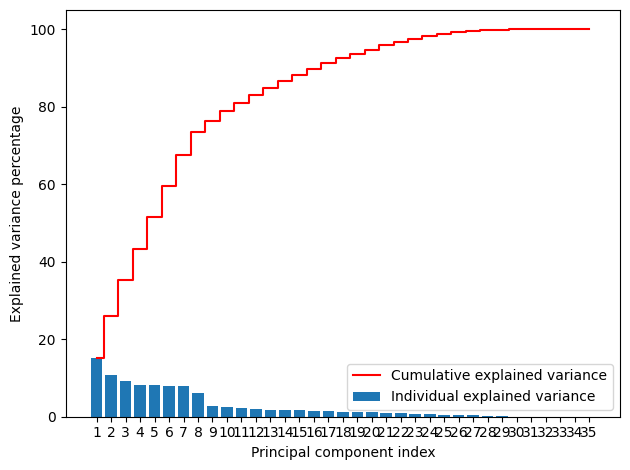

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(trainDataToPCA)
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 36), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 36), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot.png")